In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

with open("data/analyzed-projects.json", "r") as file:
  data = json.load(file)
projects = pd.DataFrame(data)

with open("data/analyzed-crates.json", "r") as file:
  data = json.load(file)
crates = pd.DataFrame(data)

ORANGE = "#e86c3c"
BLUE = "#278fea"

In [3]:
projects_mean = projects.select_dtypes(include=[np.number]).mean()
for column in projects_mean.index:
  print(f"{column}: {projects_mean[column]}")

members: 40.7
errors: 2.9
lines_of_code: 183226.45
dependencies: 425.9
defined_features: 75.2
term_nodes: 82363.85
term_edges: 82326.05
term_height: 37.95
feature_nodes: 122.45
feature_edges: 321.825
feature_squashed_edges: 140.45
artifact_nodes: 228.225
artifact_edges: 190.425
execution_time: 333.2158293247223
peak_memory_usage: 885.098828125
github_stars: 30314.975
cratesio_downloads: 3009059.0


In [4]:
crates_mean = crates.select_dtypes(include=[np.number]).mean()
for column in crates_mean.index:
  print(f"{column}: {crates_mean[column]}")

lines_of_code: 8707.570024570025
dependencies: 11.855036855036856
defined_features: 2.154791154791155
github_stars: 27882.183046683047
cratesio_downloads: 2165708.4606879605
term_nodes: 2178.9378306878307
term_edges: 2177.9378306878307
term_height: 14.81084656084656
feature_nodes: 3.2394179894179893
feature_edges: 8.51388888888889
feature_squashed_edges: 3.7156084656084656
artifact_nodes: 6.037698412698413
artifact_edges: 5.037698412698413
execution_time: 8.815233580019108
peak_memory_usage: 105.02741608796296


In [5]:
correlation = crates['peak_memory_usage'].corr(crates['lines_of_code'])
print(f"Correlation between peak memory usage and lines of code: {correlation}")

Correlation between peak memory usage and lines of code: 0.20059199879354755


In [6]:
correlation = projects['peak_memory_usage'].corr(projects['lines_of_code'])
print(f"Correlation between peak memory usage and lines of code: {correlation}")

Correlation between peak memory usage and lines of code: 0.498463711613407


In [7]:
correlation = crates['execution_time'].corr(crates['lines_of_code'])
print(f"Correlation between execution time and lines of code: {correlation}")

Correlation between execution time and lines of code: 0.10695344252139385


In [8]:
correlation = projects['execution_time'].corr(projects['lines_of_code'])
print(f"Correlation between execution time and lines of code: {correlation}")

Correlation between execution time and lines of code: 0.6292868696836462


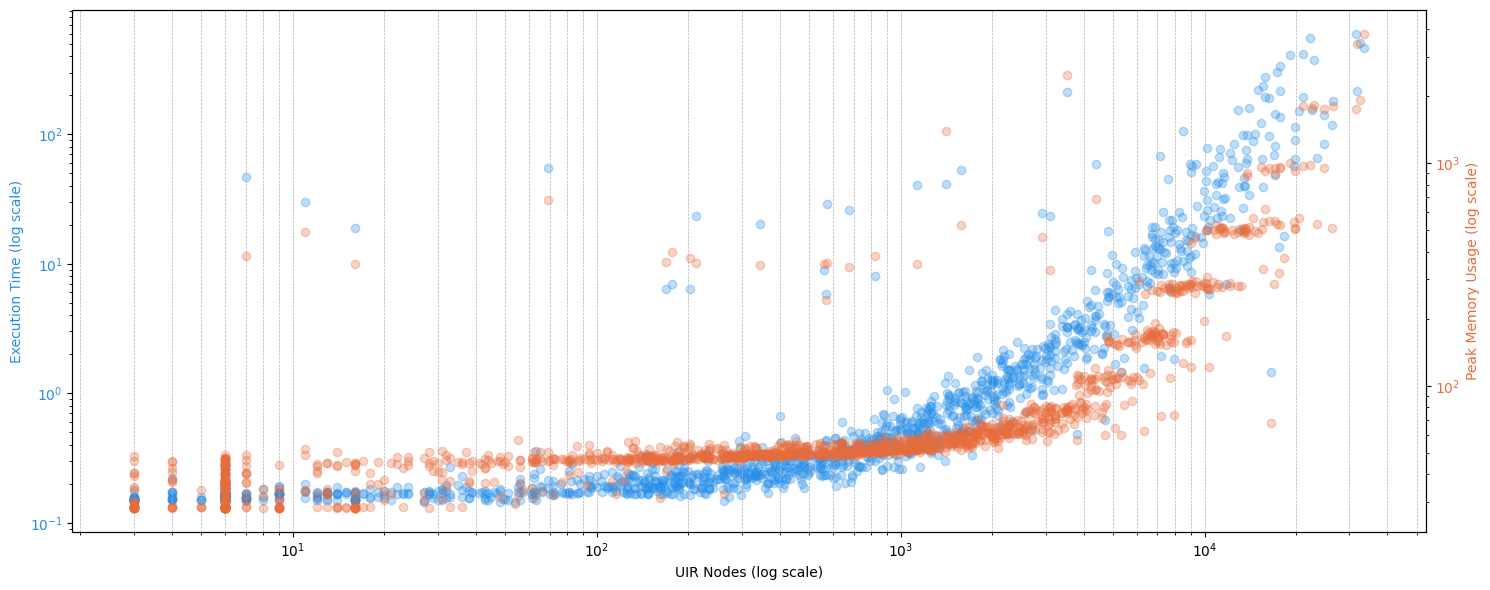

In [9]:
fig, ax1 = plt.subplots(figsize=(15, 6))


# execution time
ax1.scatter(crates['term_nodes'], crates['execution_time'], label='Execution Time', alpha=0.3, color=BLUE)
ax1.set_xlabel('UIR Nodes (log scale)')
ax1.set_ylabel('Execution Time (log scale)', color=BLUE)
ax1.tick_params(axis='y', labelcolor=BLUE)

# peak memory usage
ax2 = ax1.twinx()
ax2.scatter(crates['term_nodes'], crates['peak_memory_usage'], label='Peak Memory Usage', alpha=0.3, color=ORANGE)
ax2.set_ylabel('Peak Memory Usage (log scale)', color=ORANGE)
ax2.tick_params(axis='y', labelcolor=ORANGE)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')

# plt.title('Correlation between UIR Nodes, Execution Time, and Peak Memory Usage')
ax1.grid(True, axis='x', which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()
# plt.savefig('uir-nodes.pdf')
plt.show()
plt.close()


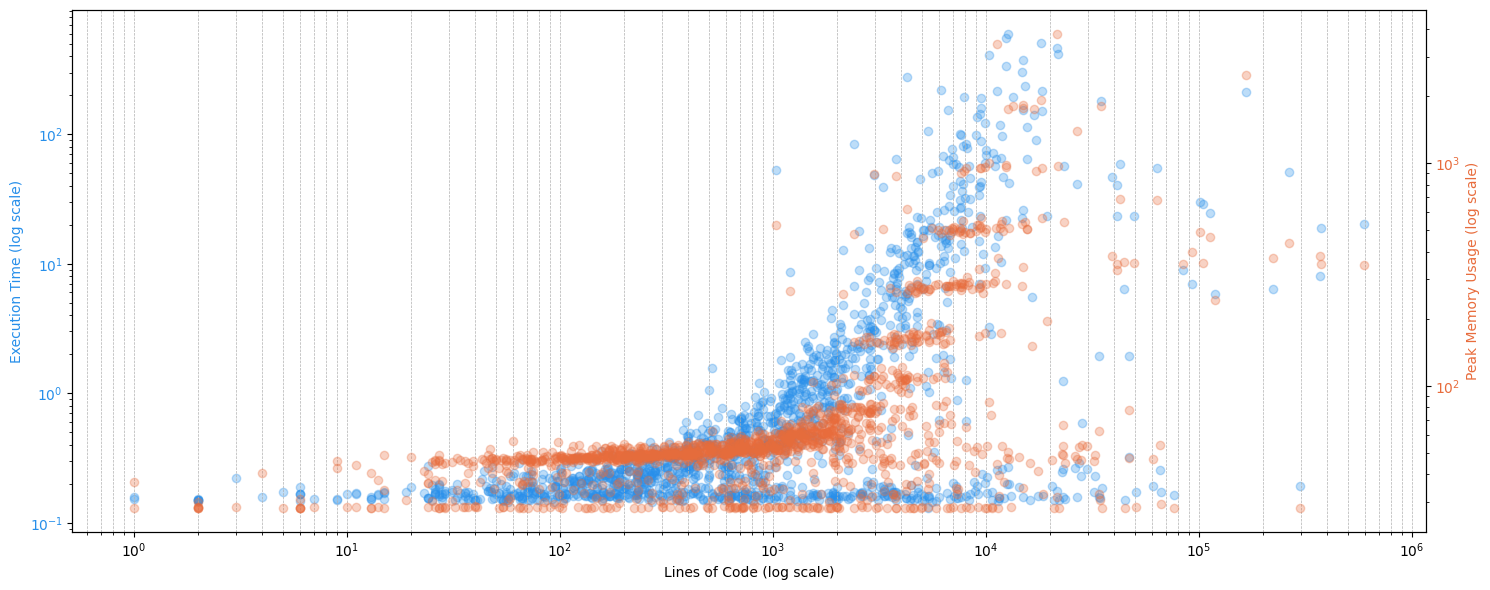

In [10]:
fig, ax1 = plt.subplots(figsize=(15, 6))


X = 'lines_of_code'

# execution time
ax1.scatter(crates[X], crates['execution_time'], label='Execution Time', alpha=0.3, color=BLUE)
ax1.set_xlabel('Lines of Code (log scale)')
ax1.set_ylabel('Execution Time (log scale)', color=BLUE)
ax1.tick_params(axis='y', labelcolor=BLUE)

# peak memory usage
ax2 = ax1.twinx()
ax2.scatter(crates[X], crates['peak_memory_usage'], label='Peak Memory Usage', alpha=0.3, color=ORANGE)
ax2.set_ylabel('Peak Memory Usage (log scale)', color=ORANGE)
ax2.tick_params(axis='y', labelcolor=ORANGE)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')


# plt.title('Correlation between Lines of Code, Execution Time, and Peak Memory Usage')
ax1.grid(True, axis='x', which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()
# plt.savefig('lines-of-code.pdf')
plt.show()
plt.close()


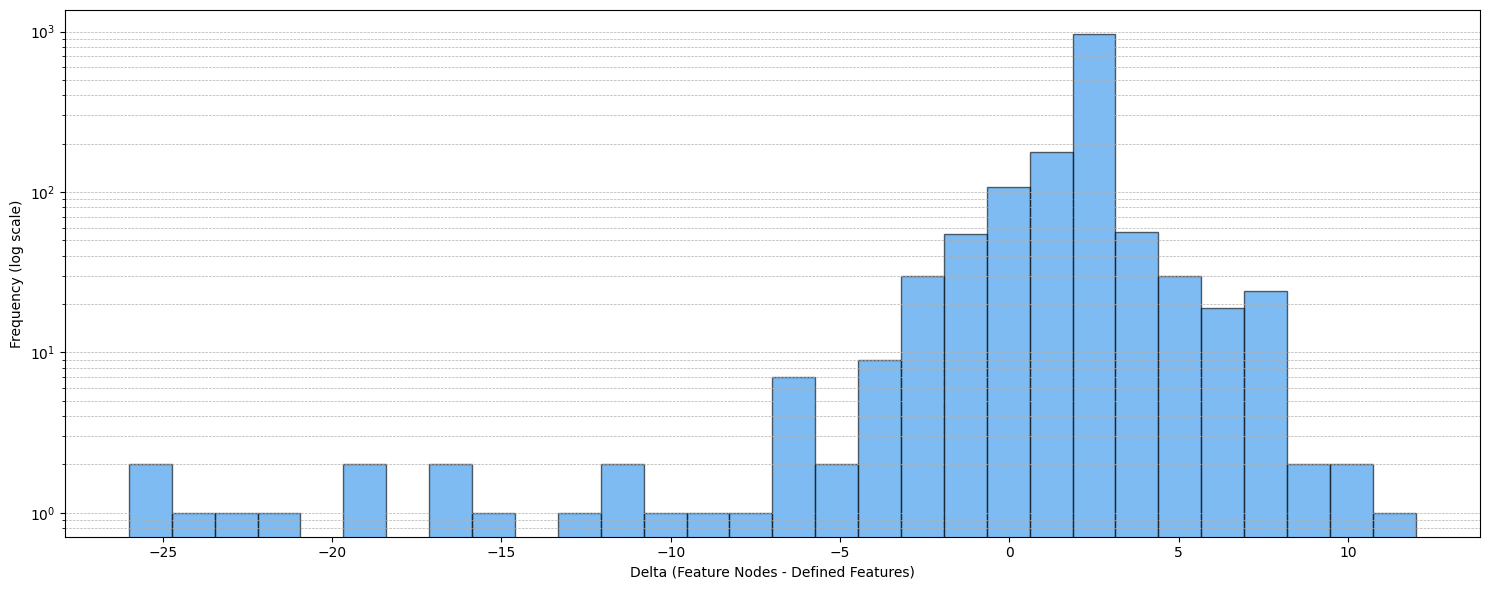

In [11]:
plt.figure(figsize=(15, 6))
plt.yscale('log')

delta = crates['feature_nodes'] - crates['defined_features']
delta = delta[delta > -40] # outliers
plt.hist(delta, bins=30, color=BLUE, edgecolor='black', alpha=0.6)
plt.xlabel('Delta (Feature Nodes - Defined Features)')
plt.ylabel('Frequency (log scale)')
# plt.title('Histogram of Difference between Feature Nodes and Defined Features')
plt.grid(True, axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
# plt.savefig('features-delta.pdf')
plt.show()
plt.close()
